In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn.feature_selection import SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
data = pd.read_csv('data/data.csv', index_col='row_id')
submission = pd.read_csv('result/sample_submission.csv', index_col='row-col')

<AxesSubplot:>

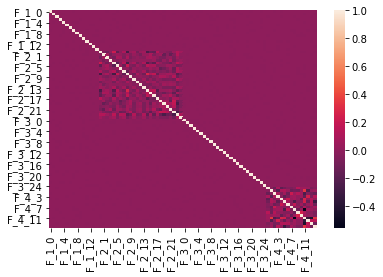

In [3]:
sns.heatmap(data.corr())

1) split in 4 groups
2) group 1 : replace by mean
3) group 2 : no missing data
4) group 3 : replace by mean
5) group 4 : fill with xgboost

In [4]:
for col in data.columns:
    if "F_4" not in col:
        data[col] = data[col].fillna(data[col].mean())

In [5]:
listeF_4 = []
listeF_4content = []
for col in data.columns:
    if 'F_4' in col:
        listeF_4.append(col)
f4data = data[listeF_4]

print(listeF_4)
listeF_4Result = []

['F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']


In [6]:
correlation=f4data.corr()

def select_column(name,threshold):
    liste_tmp = []
    for col in listeF_4:
        if abs(correlation[name][col])>threshold:
            liste_tmp.append(col)
    liste_tmp.remove(name)
    liste_tmp.append(name)
    return liste_tmp

print(listeF_4)
select_column("F_4_0",0.15)
select_column("F_4_1",0.15)

['F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']


['F_4_3', 'F_4_11', 'F_4_12', 'F_4_1']

In [7]:
iimp = IterativeImputer(
    estimator = xgboost.XGBRegressor(),
    random_state = 42,
    verbose = 20,
    max_iter=10
)

def fill_column(name,liste):
    final = (iimp.fit_transform(data[liste]))
    listeF_4content.append(final.T[-1])
    return final

In [8]:
select_column("F_4_0",0.15)
select_column("F_4_1",0.15)

['F_4_3', 'F_4_11', 'F_4_12', 'F_4_1']

In [9]:
fill_column("F_4_0",select_column("F_4_0",0.15))
fill_column("F_4_1",select_column("F_4_1",0.15))
fill_column("F_4_2",select_column("F_4_2",0.12))
fill_column("F_4_3",select_column("F_4_3",0.15))
fill_column("F_4_4",select_column("F_4_4",0.15))
fill_column("F_4_5",select_column("F_4_5",0.15))
fill_column("F_4_6",select_column("F_4_6",0.12))
fill_column("F_4_7",select_column("F_4_7",0.12))
fill_column("F_4_8",select_column("F_4_8",0.15))
fill_column("F_4_9",select_column("F_4_9",0.12))
fill_column("F_4_10",select_column("F_4_10",0.12))
fill_column("F_4_11",select_column("F_4_11",0.3))
fill_column("F_4_12",select_column("F_4_12",0.2))
fill_column("F_4_13",select_column("F_4_13",0.12))
fill_column("F_4_14",select_column("F_4_14",0.15))



[IterativeImputer] Completing matrix with shape (1000000, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 86.10
[IterativeImputer] Change: 4.779046097556964, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 2/10, elapsed time 176.18
[IterativeImputer] Change: 1.7915469408035278, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 3/10, elapsed time 269.26
[IterativeImputer] Change: 1.9738725423812866, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 4/10, elapsed time 358.53
[IterativeImputer] Change: 1.8656246662139893, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 5/10, elapsed time 444.72
[IterativeImputer] Change: 1.7232788652181625, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 6/10, elapsed time 530.92
[IterativeImputer] Change: 1.9256418347358704, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 7/10, elapsed ti

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Ending imputation round 1/10, elapsed time 120.51
[IterativeImputer] Change: 13.652211412377248, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 241.35
[IterativeImputer] Change: 7.0979297161102295, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 362.01
[IterativeImputer] Change: 4.429364204406738, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 482.60
[IterativeImputer] Change: 3.2178797721862793, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 603.26
[IterativeImputer] Change: 4.266018390655518, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 724.03
[IterativeImputer] Change: 6.9888527393341064, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time 845.90
[IterativeImputer] Change: 3.717424988746643, scale

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 318.52
[IterativeImputer] Change: 17.999648233013154, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 639.01
[IterativeImputer] Change: 6.955639440566301, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 960.29
[IterativeImputer] Change: 4.9329705238342285, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1281.88
[IterativeImputer] Change: 4.381627798080444, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1604.50
[IterativeImputer] Change: 4.688612222671509, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1942.49
[IterativeImputer] Change: 5.727038860321045, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed t

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 161.14
[IterativeImputer] Change: 14.255500062889944, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 324.55
[IterativeImputer] Change: 5.090968132019043, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 486.73
[IterativeImputer] Change: 5.464149713516235, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 648.36
[IterativeImputer] Change: 3.966747283935547, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 811.02
[IterativeImputer] Change: 5.697142601013184, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 973.20
[IterativeImputer] Change: 5.208116888999939, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time 

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 121.04
[IterativeImputer] Change: 10.331817765789033, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 244.66
[IterativeImputer] Change: 4.349950671195984, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 366.10
[IterativeImputer] Change: 4.585565805435181, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 495.72
[IterativeImputer] Change: 3.872589647769928, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 629.93
[IterativeImputer] Change: 2.9855000972747803, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 751.65
[IterativeImputer] Change: 4.304043412208557, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 160.02
[IterativeImputer] Change: 17.470187326030732, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 322.35
[IterativeImputer] Change: 5.9588727951049805, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 484.55
[IterativeImputer] Change: 3.615832209587097, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 646.60
[IterativeImputer] Change: 4.196232914924622, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 808.09
[IterativeImputer] Change: 4.557883262634277, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 969.35
[IterativeImputer] Change: 4.159428298473358, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 85.34
[IterativeImputer] Change: 4.697985211173908, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 2/10, elapsed time 171.13
[IterativeImputer] Change: 2.5405063033103943, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 3/10, elapsed time 256.52
[IterativeImputer] Change: 2.0646137595176697, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 4/10, elapsed time 342.41
[IterativeImputer] Change: 2.118062525987625, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 5/10, elapsed time 429.85
[IterativeImputer] Change: 1.9101808071136475, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 6/10, elapsed time 515.72
[IterativeImputer] Change: 2.092120200395584, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 7/10, elapsed time

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 165.13
[IterativeImputer] Change: 17.38463511045456, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 337.58
[IterativeImputer] Change: 5.387937545776367, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 527.44
[IterativeImputer] Change: 6.838773488998413, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 691.17
[IterativeImputer] Change: 4.855335712432861, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 854.13
[IterativeImputer] Change: 4.342129349708557, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1017.18
[IterativeImputer] Change: 4.62275767326355, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time 1

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 120.89
[IterativeImputer] Change: 16.031745095806123, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 242.02
[IterativeImputer] Change: 4.190598487854004, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 363.32
[IterativeImputer] Change: 5.21681547164917, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 484.44
[IterativeImputer] Change: 3.6437877416610718, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 605.44
[IterativeImputer] Change: 4.174056053161621, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 726.72
[IterativeImputer] Change: 3.6356008052825928, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 158.46
[IterativeImputer] Change: 8.064116589578068, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 2/10, elapsed time 317.22
[IterativeImputer] Change: 2.6157937049865723, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 3/10, elapsed time 476.69
[IterativeImputer] Change: 2.112664669752121, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 4/10, elapsed time 635.62
[IterativeImputer] Change: 3.8077162504196167, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 5/10, elapsed time 794.05
[IterativeImputer] Change: 2.695107936859131, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 6/10, elapsed time 952.78
[IterativeImputer] Change: 2.4892501831054688, scaled tolerance: 0.012878366 
[IterativeImputer] Ending imputation round 7/10, elapsed tim

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 120.10
[IterativeImputer] Change: 5.0037637225804055, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 2/10, elapsed time 240.18
[IterativeImputer] Change: 2.7831006422638893, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 3/10, elapsed time 360.08
[IterativeImputer] Change: 2.038003832101822, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 4/10, elapsed time 480.04
[IterativeImputer] Change: 1.8406187295913696, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 5/10, elapsed time 600.36
[IterativeImputer] Change: 3.1982247829437256, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 6/10, elapsed time 720.99
[IterativeImputer] Change: 2.424047838896513, scaled tolerance: 0.012825041 
[IterativeImputer] Ending imputation round 7/10, elapsed ti

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 328.33
[IterativeImputer] Change: 19.28039060060501, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 657.76
[IterativeImputer] Change: 3.8193209171295166, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 988.08
[IterativeImputer] Change: 3.891091823577881, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1317.71
[IterativeImputer] Change: 2.881566882133484, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1648.38
[IterativeImputer] Change: 3.349595308303833, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1998.41
[IterativeImputer] Change: 2.903921127319336, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed ti

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 120.94
[IterativeImputer] Change: 14.776416047997365, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 242.02
[IterativeImputer] Change: 5.7757813930511475, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 363.45
[IterativeImputer] Change: 4.668995380401611, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 484.93
[IterativeImputer] Change: 4.749413371086121, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 607.16
[IterativeImputer] Change: 4.158445835113525, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 728.97
[IterativeImputer] Change: 3.4440607726573944, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed tim

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 164.07
[IterativeImputer] Change: 19.391655783100127, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 329.73
[IterativeImputer] Change: 4.271142601966858, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 494.18
[IterativeImputer] Change: 3.776063919067383, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 658.70
[IterativeImputer] Change: 4.487439155578613, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 823.78
[IterativeImputer] Change: 3.559762954711914, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1023.71
[IterativeImputer] Change: 3.6810138821601868, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed tim

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Completing matrix with shape (1000000, 4)
[IterativeImputer] Ending imputation round 1/10, elapsed time 121.81
[IterativeImputer] Change: 16.38812174375534, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 2/10, elapsed time 243.90
[IterativeImputer] Change: 3.9543861150741577, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 3/10, elapsed time 366.30
[IterativeImputer] Change: 4.53106689453125, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 4/10, elapsed time 488.87
[IterativeImputer] Change: 3.840262293815613, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 5/10, elapsed time 611.13
[IterativeImputer] Change: 4.776745796203613, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 6/10, elapsed time 733.73
[IterativeImputer] Change: 3.8695430159568787, scaled tolerance: 0.031229363 
[IterativeImputer] Ending imputation round 7/10, elapsed time 

C:\Users\brieu\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


array([[ 3.744152e+00,  6.206995e+00,  3.809505e+00,  1.182055e+00],
       [-2.895826e+00,  5.232157e+00, -4.218259e+00, -6.377500e-02],
       [ 2.252834e+00, -1.164570e-01, -2.131747e+00, -1.315760e-01],
       ...,
       [ 2.891854e+00,  3.609790e+00, -5.841080e-01, -9.975020e-01],
       [-1.135003e+00,  8.462660e-01, -1.085554e+00,  4.831000e-03],
       [ 1.079820e+00, -2.448386e+00,  2.334131e+00, -8.288470e-01]])

In [10]:
for i in range(15):
    data["F_4_"+str(i)] = listeF_4content[i]

In [11]:
for i in tqdm(submission.index):
    row = int(i.split('-')[0])
    col = i.split('-')[1]
    submission.loc[i, 'value'] = data.loc[row, col]

submission.to_csv('mean_benchmark.csv')

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:15<00:00, 13312.57it/s]
